In [7]:
# Data anlaysis 



In [8]:
# bike_train.csv 로 여러가지 분석해보기 

In [9]:
# 질문하기  ( Ask questions)
# 1. 어떤 기상정보가 자전거 대여량에 영향을 미칠까 
# 2. 어떤 날짜(요일, 달, 계절) 에 대여량이 많을까(혹 적을까) 
# 3. 언제 프로모션을 하면 좋을까 
 

In [10]:
# 데이터 랭글링
 
import pandas as pd # 판다스 모듈 



In [11]:
# 데이터 적재 
데이터 프레임 = pd.read_csv(파일명 입력 )

SyntaxError: invalid syntax (2371315673.py, line 2)

In [12]:

bike=pd.read_csv('./bike_train.csv')

In [13]:
# 데이터 평가 
bike.head()  # 데이터 훑어보기 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
bike.info() # 데이터타입,데이터누락건수, 몇개의 컬럼, 몇개의 샘플 인지 알려줌 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
# 데이터 정재 (누락된 값 처리 ,잘못된 데이터 타입) 
# bike.datetime  # datetime 열 값 구하기 

bike['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [16]:
# datatime 열의 데이터타입을 datetime으로 바꾸기 (년 월 일 시간 으로 분리할수 있음)
bike['datetime'] = bike['datetime'].apply(pd.to_datetime)

In [17]:
bike['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [18]:
# 년 월 시간 요일 컬럼 만들어서 추가하기 
bike['year'] = bike['datetime'].apply(lambda x: x.year)
bike['month'] = bike['datetime'].apply(lambda x : x.month)
bike['hour'] = bike['datetime'].apply(lambda x : x.hour)
bike['dayofweek'] = bike['datetime'].apply(lambda x : x.dayofweek) # 요일

In [19]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot: xlabel='temp', ylabel='count'>

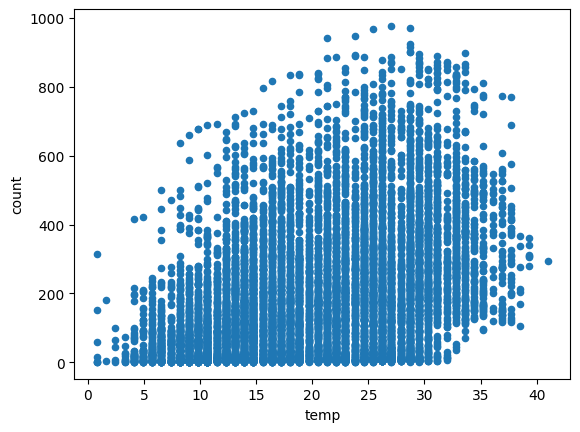

In [20]:
# 데이터 탐색 by 산점도 

bike.plot(kind = 'scatter', x = 'temp', y = 'count')

In [21]:
import matplotlib.pyplot as plt

In [22]:
# 데이터 탐색 by 상관계수 
bike.corr() 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2488\3643918419.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bike.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,-0.006546,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.000354,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.002780,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.022740,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.145430,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.140343,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.278011,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.146631,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.302045,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.380540,-0.084427


In [23]:
# 질문 1 : 어떤 기상정보가 자전거 대여량에 영향을 미칠까 

<AxesSubplot: xlabel='temp', ylabel='count'>

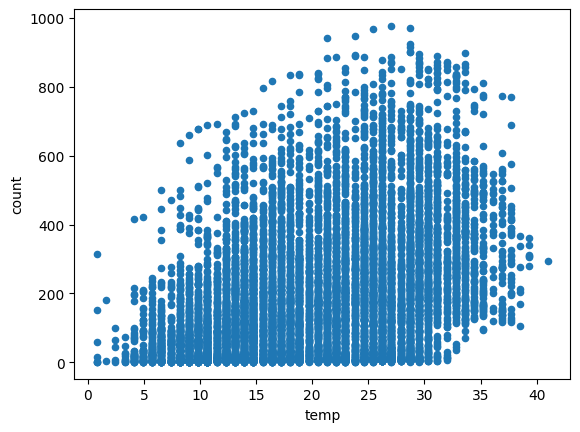

In [27]:
# 산점도 
import pandas as pd # 판다스 사용 
bike.plot(kind = 'scatter' , x = 'temp', y= 'count')

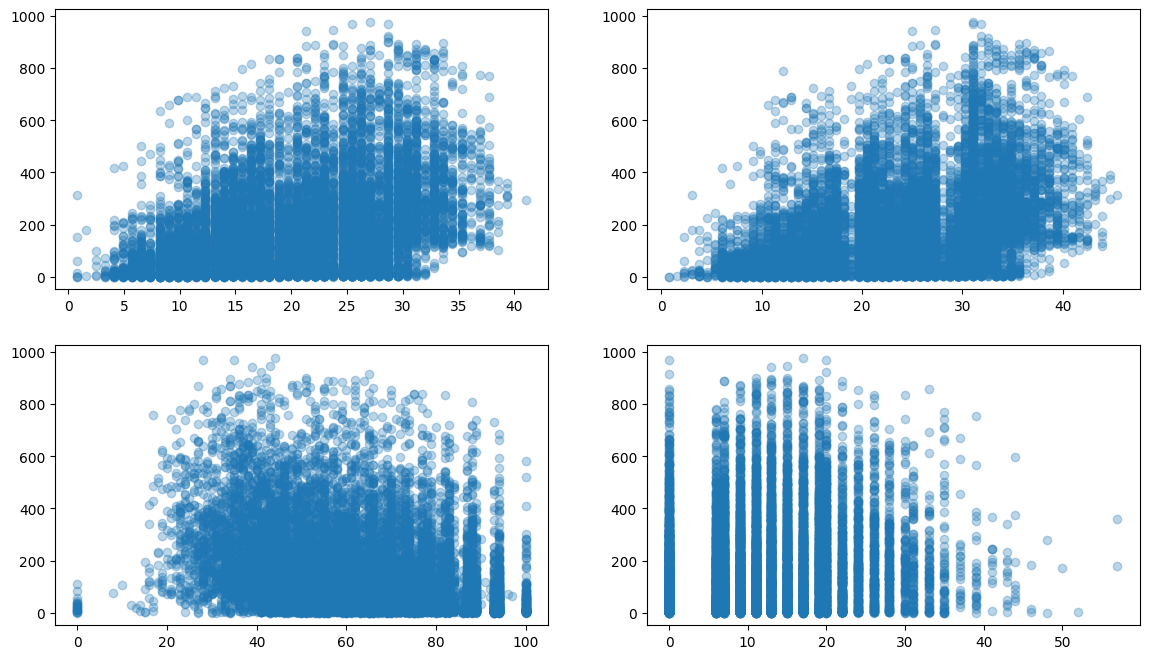

In [37]:
import matplotlib.pyplot as plt  #matplotlib 사용 

# fig: 전체페이지  axes: 표  , nrow,ncols: axes 개수
# fig 사이즈를 (14,8) 로 만들고 2x2 로 subplot 만들기   
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize =(14,8))

# 온도,체감온도,습도, 풍속 에 따른 산점도 
axes[0][0].scatter(bike['temp'], bike['count'], alpha = 0.3) # alpha는 흐림정도
axes[0][1].scatter(bike['atemp'], bike['count'], alpha = 0.3)
axes[1][0].scatter(bike['humidity'], bike['count'], alpha = 0.3)
axes[1][1].scatter(bike['windspeed'], bike['count'], alpha = 0.3)

In [34]:
# 상관계수 활용 
bike.corr()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2488\385509608.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bike.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,-0.006546,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.000354,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.002780,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.022740,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.145430,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.140343,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.278011,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.146631,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.302045,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.380540,-0.084427


In [35]:
# 질문 1에 대한 분석결과 
# - 기상 정보 중 온도와 체감 온도가 자전거 대여 수량에 영향을 미치는 것으로 보임

In [ ]:
# 질문 2 : 어떤 날짜(요일, 달, 계절) 에 대여량이 많을까(혹 적을까)

<AxesSubplot: xlabel='hour', ylabel='count'>

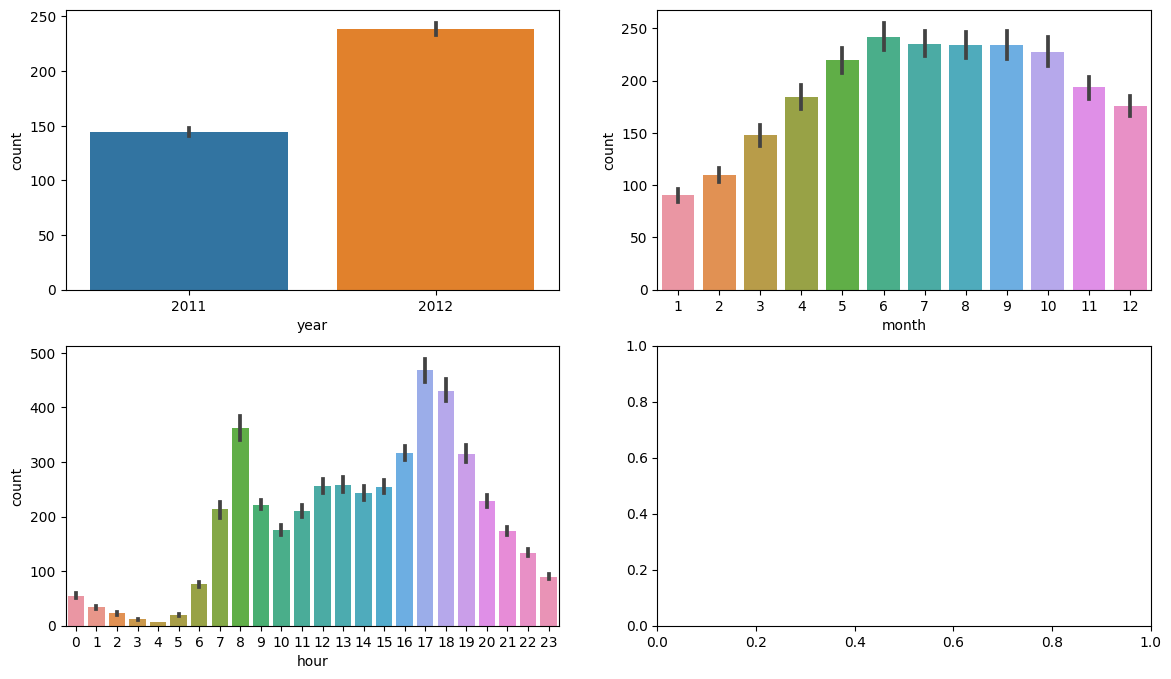

In [48]:
# seaborn 사용 
import seaborn as sns

fig, axes = plt.subplots(nrows = 2, ncols =2 , figsize= (14,8))
sns.barplot(data = bike, x='year' , y ='count', ax=axes[0][0])
sns.barplot(data = bike, x='month' , y ='count', ax=axes[0][1])
sns.barplot(data = bike, x='hour' , y ='count', ax=axes[1][0])



In [ ]:
# 질문 2 분석결과 
# - 연도별 평균 대여량은 2011년 보다 2012년도에 더 많음
# 월별 평균 대여량은 6월이 가장많고, 7~10월에도 많음. 1월에 가장 적음
# 시간대별 평균 대여량은 오전 8시 전후와, 오후 5~6시 부근에 많음


In [ ]:
# 결론 도출 또는 예측 
# 질문 1,2로 분석결과 확인하고 
# 전략을 수립함 

In [ ]:
# 결과 공유 
# 이거 토대로 보고서 같은 걸 만든다

In [ ]:
# 해ㅐㅇ
